In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [3]:
data = pd.read_parquet('/Users/paddy/Documents/GitHub/Masterthesis_ML/data/03_032022_032023_taxi_rides.parquet')

Data Preparation for heat map

In [27]:
grouped = data.groupby('PULocationID').size().reset_index(name='counts')
grouped.set_index('PULocationID')

,counts
PULocationID,
1,9907
2,28
3,578
4,48620
5,598
...,...
261,196313
262,523159
263,820234


In [39]:
grouped.sort_values(by='counts', ascending=False)

,PULocationID,counts
128,132,1886713
233,237,1820092
232,236,1618944
157,161,1541701
138,142,1270185
...,...,...
98,99,19
172,176,18
83,84,16
102,105,14


Heat map plotten

In [5]:
shapefile = "/Users/paddy/Documents/GitHub/Masterthesis_ML/raw/taxi_zones/taxi_zones.geojson"
taxi_zones = gpd.read_file(shapefile)

In [6]:
taxi_zones = pd.concat([taxi_zones, grouped], axis=1, join='inner')

In [7]:
cmin = taxi_zones['counts'].min()
cmax = taxi_zones['counts'].max()
cmap = 'viridis'

AttributeError: 'RangeIndex' object has no attribute 'figure'

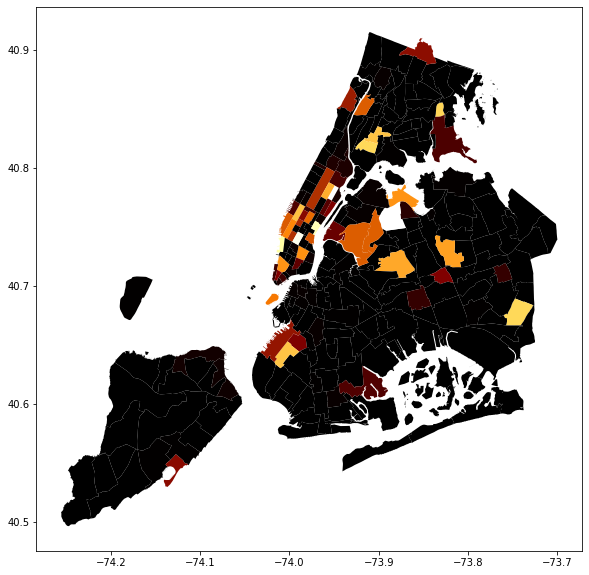

In [8]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = taxi_zones.plot(column=taxi_zones['counts'], cmap='afmhot', ax=ax,label='heatmap')
plt.colorbar(taxi_zones['counts'], label='colorbar label')


plt.show() 
## es fehlen noch Legenden

Scatterplot to show area and its counts

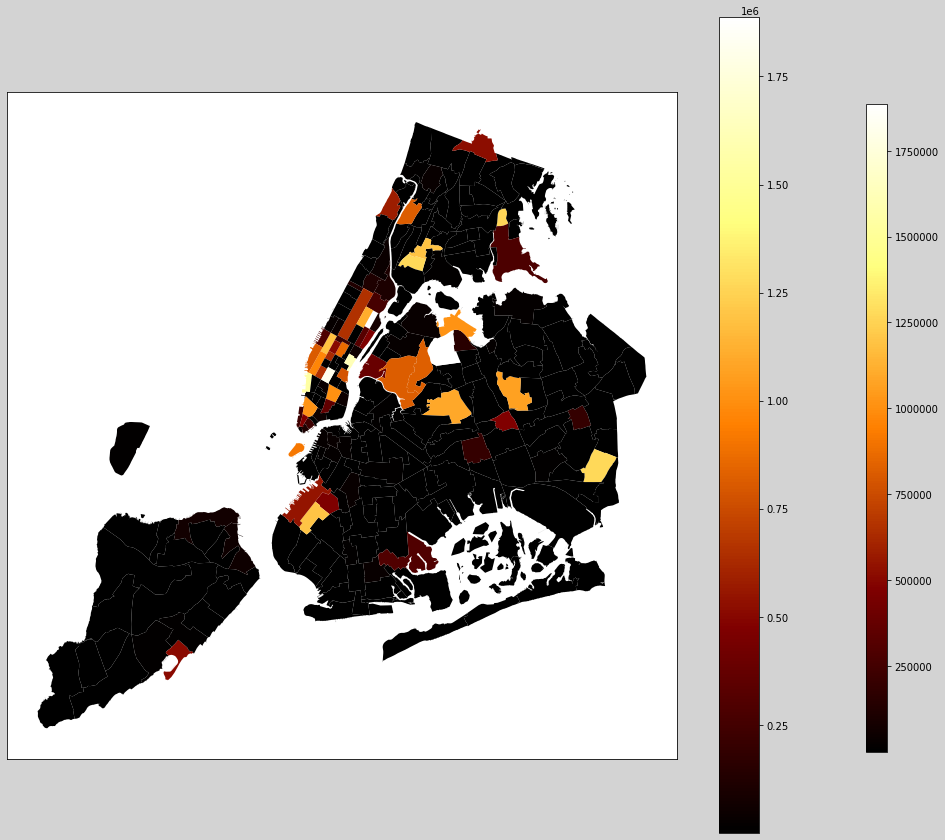

In [62]:
import matplotlib.pyplot as plt

# Dein Plotcode
f, ax = plt.subplots(1, figsize=(15, 15))
ax = taxi_zones.plot(column=taxi_zones['counts'], cmap='afmhot', ax=ax, legend=True)

# Hinzufügen der Colorbar mit ausgeschriebenen Zahlen
cax = f.add_axes([0.92, 0.2, 0.02, 0.6])  # Position und Größe der Colorbar anpassen
sm = plt.cm.ScalarMappable(cmap='afmhot', norm=plt.Normalize(vmin=taxi_zones['counts'].min(), vmax=taxi_zones['counts'].max()))
sm.set_array([])
cbar = f.colorbar(sm, cax=cax, format='%d')  # Formatierung der Colorbar mit ausgeschriebenen Zahlen

# Deaktivieren der x- und y-Labels
ax.set_xticks([])
ax.set_yticks([])

f.set_facecolor('lightgray')

plt.show()




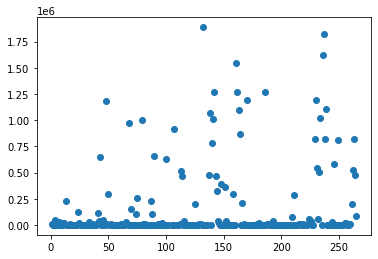

In [9]:
fig = plt.scatter(grouped['PULocationID'], grouped['counts'])
#plt.xticks(range(1, 265))
#plt.yticks(range(cmin, cmax))


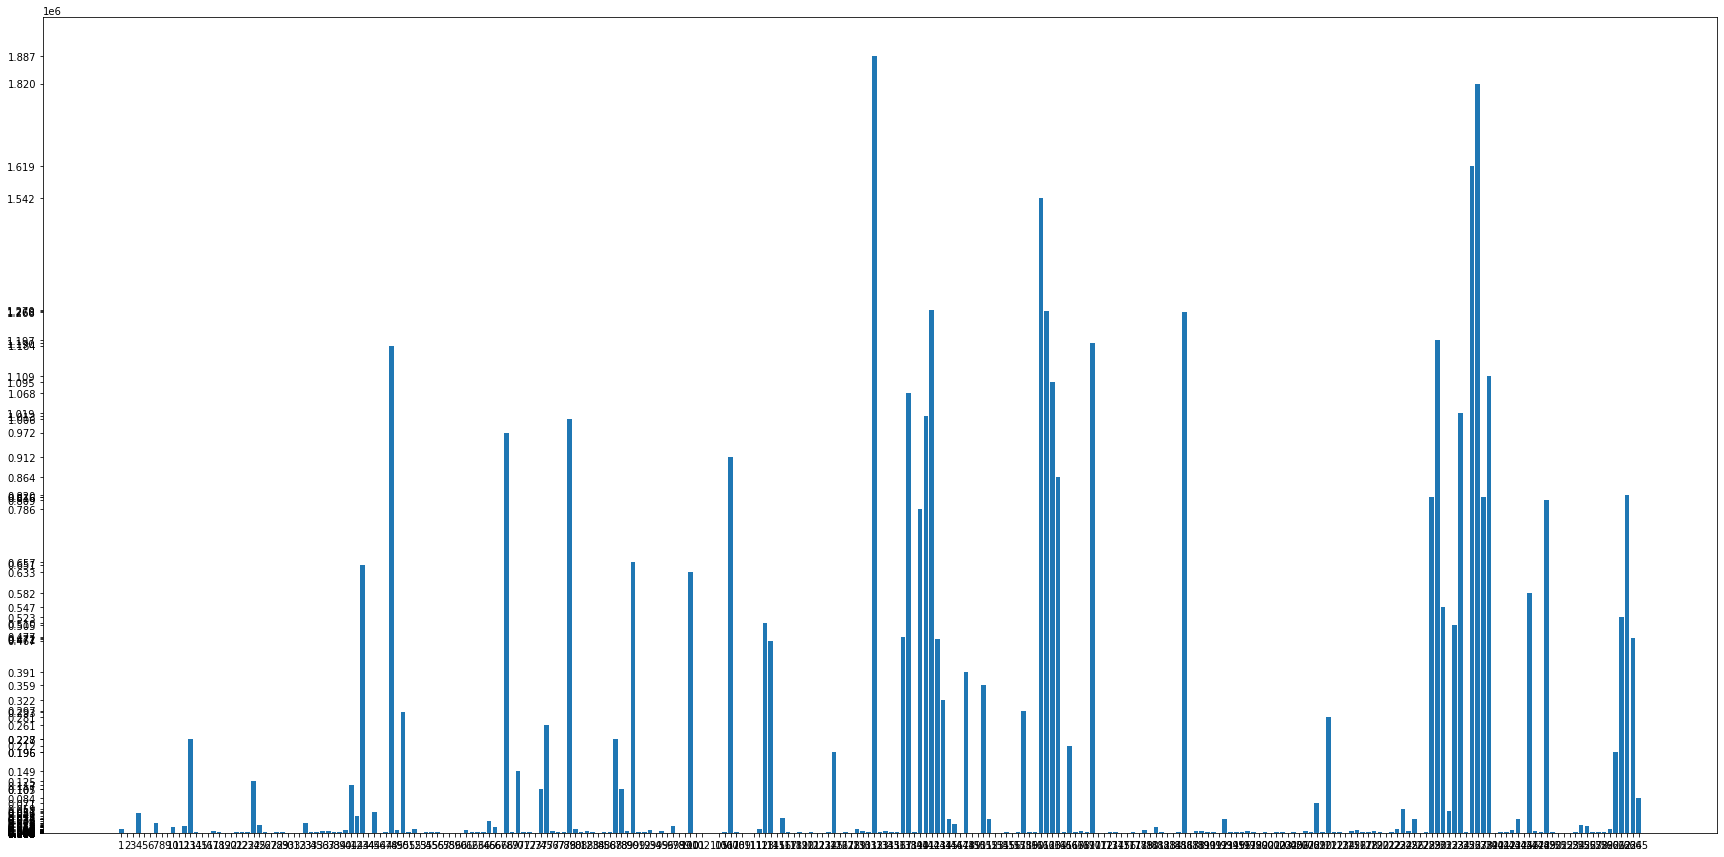

In [46]:
fig = plt.subplots(1, figsize=(30,15))
fig = plt.bar(grouped['PULocationID'], grouped['counts'])

#fig = plt.set_yticks(grouped['counts'].min(), grouped['counts'].max())
fig = plt.yticks(grouped['counts'])
fig = plt.xticks(grouped['PULocationID'])


